In [7]:
import pandas as pd
import os
import numpy as np
# from utils.data_process import sample_data

In [1]:
import tensorflow as tf
import keras
print(keras.__version__)

3.3.3


In [8]:
sample_size = 150

In [9]:
def sample_data(data, sample_size=150):
    data_points = len(data)
    if data_points < sample_size:
        print()
        return (None, 0)
    num_samples = int(data_points/sample_size)
    # print(num_samples)
    # int((data_points - (data_points % sample_size)) /sample_size)
    final_data = data[:num_samples*sample_size]
    if data_points - num_samples * sample_size > 0: 
        final_data = np.append(final_data, data[data_points-sample_size:])
        # print(np.shape(final_data))
        num_samples += 1
    final_data = np.array_split(final_data, num_samples)
    return (final_data, num_samples)

x = []
y = []
for file in os.listdir("data/preds"):
    df = pd.read_csv(f"data/preds/{file}")
    pulse = np.array(df["pulse"])
    pulse, num_samples = sample_data(pulse, sample_size)
    if num_samples==0: continue
    # if df["sys"][0] < 110 or df["sys"][0] > 145: continue
    x.extend(pulse)
    y.extend([[df["sys"][0], df["dia"][0]]]*num_samples)
x = np.array(x)
y = np.array(y)
print(np.shape(x))
print(np.shape(y))





(309, 150)
(309, 2)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=10)


In [11]:
print(np.shape(x_test))
print(np.shape(y_test))

(16, 150)
(16, 2)


In [12]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, RNN, GlobalAvgPool1D, LeakyReLU, BatchNormalization, Activation
from keras.losses import mean_absolute_error
from keras.losses import mean_squared_error

In [38]:
conv = Sequential()

conv.add(Conv1D(filters=64, kernel_size=3,input_shape=(sample_size, 1), activation='relu', name="conv1d_1"))
# conv.add(BatchNormalization())
# , strides=2, padding='same'
conv.add(MaxPooling1D(pool_size=2))
# , strides=2, padding='same'
conv.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="conv1d_2"))
# conv.add(BatchNormalization())
conv.add(MaxPooling1D(pool_size=2))
# , strides=2, padding='same'
conv.add(Conv1D(filters=16, kernel_size=3, activation='relu', name="conv1d_3"))
# conv.add(BatchNormalization())
conv.add(MaxPooling1D(pool_size=2))
# , strides=2, padding='same'
conv.add(Flatten())
conv.add(Dense(2))  # 2 outputs for systolic and diastolic pressure

conv.compile(optimizer='adam', loss=mean_absolute_error )
epochs = 20
batch_size = 35
conv_his = conv.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.05)
conv.summary()

c:\Users\Aliaan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 102.3059 - val_loss: 106.2479
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 100.6665 - val_loss: 104.9163
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 99.6984 - val_loss: 101.4880
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 94.5332 - val_loss: 93.3426
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 85.0754 - val_loss: 75.0833
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 62.8691 - val_loss: 39.4147
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.6344 - val_loss: 23.4188
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.6656 - val_loss: 12.1852
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 20.8383 - val_loss: 13.8835
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 20.8336 - val_loss: 11.1425
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 20.3216 - val_loss: 10.3226
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss:

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 148, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 72, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 34, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 17, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 272)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,592 (99.97 KB)

 Trainable params: 8,530 (33.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,062 (66.65 KB)

In [39]:
conv_lstm = Sequential()
conv_lstm.add(Conv1D(filters=64, kernel_size=3,input_shape=(sample_size, 1), activation='relu', name="conv1d_1"))

conv_lstm.add(MaxPooling1D(pool_size=2))

conv_lstm.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="conv1d_2"))

conv_lstm.add(MaxPooling1D(pool_size=2))

conv_lstm.add(Conv1D(filters=16, kernel_size=3, activation='relu', name="conv1d_3"))

conv_lstm.add(MaxPooling1D(pool_size=2))

# , strides=2
conv_lstm.add(LSTM(64, return_sequences=True))
conv_lstm.add(Flatten())
conv_lstm.add(Dense(2)) 
conv_lstm.compile(optimizer='adam', loss=mean_absolute_error )
epochs = 20
batch_size = 35
conv_lstm_his = conv_lstm.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.05)
conv_lstm.summary()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - loss: 102.0189 - val_loss: 105.6842
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 100.3226 - val_loss: 100.0692
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 93.3996 - val_loss: 89.7638
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 82.7670 - val_loss: 76.4286
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 68.8101 - val_loss: 61.7708
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 53.3733 - val_loss: 47.8782
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 40.5607 - val_loss: 36.1164
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 31.2487 - val_loss: 28.2223
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 24.9953 - val_loss: 22.5871
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 19.1743 - val_loss: 17.1235
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.8251 - val_loss: 12.5351
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss:

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 148, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 72, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 34, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 17, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 17, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1088)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         2,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,696 (362.10 KB)

 Trainable params: 30,898 (120.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,798 (241.40 KB)

In [40]:
resnet = Sequential()

resnet.add(Conv1D(filters=16, kernel_size=64, strides = 16, input_shape=(sample_size, 1), activation='relu', name="conv1d_1"))
# resnet.add(BatchNormalization())
resnet.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

resnet.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="conv1d_2"))
# resnet.add(BatchNormalization())
resnet.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

resnet.add(Conv1D(filters=32, kernel_size=3, activation='relu', name="conv1d_3", padding='same'))
# resnet.add(BatchNormalization())
resnet.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

resnet.add(Conv1D(filters=64, kernel_size=3, activation='relu', name="conv1d_4", padding='same'))
# resnet.add(BatchNormalization())
resnet.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

resnet.add(Conv1D(filters=64, kernel_size=3, activation='relu', name="conv1d_5", padding='same'))
# resnet.add(BatchNormalization())
resnet.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

resnet.add(Conv1D(filters = 32, kernel_size=3, strides=2, name="conv1d_6", padding='same'))
# resnet.add(BatchNormalization())
resnet.add(Activation('relu'))
resnet.add(Conv1D(filters = 32, kernel_size=3, strides=2, name="conv1d_7", padding='same', use_bias=False))
# resnet.add(BatchNormalization())

resnet.add(Conv1D(filters = 64, kernel_size=3, strides=2, name="conv1d_8", padding='same'))
# resnet.add(BatchNormalization())
resnet.add(Activation('relu'))
resnet.add(Conv1D(filters = 64, kernel_size=3, strides=1, name="conv1d_9", padding='same', use_bias=False))
# resnet.add(BatchNormalization())

resnet.add(Conv1D(filters = 128, kernel_size=3, strides=2, name="conv1d_10", padding='same'))
# resnet.add(BatchNormalization())
resnet.add(Activation('relu'))
resnet.add(Conv1D(filters = 128, kernel_size=3, strides=1, name="conv1d_11", padding='same', use_bias=False))
# resnet.add(BatchNormalization())

resnet.add(Flatten())
# model.add(Dense(32, activation='relu'))
resnet.add(Dense(2))  # 2 outputs for systolic and diastolic pressure

resnet.compile(optimizer='adam', loss=mean_absolute_error )
epochs = 20
batch_size = 35
resnet_his = resnet.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.05)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 288ms/step - loss: 102.2291 - val_loss: 106.6945
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 101.9600 - val_loss: 106.1297
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 100.7538 - val_loss: 99.4306
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 83.7654 - val_loss: 24.5700
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 39.9163 - val_loss: 42.0093
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 35.6448 - val_loss: 15.6723
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 31.0761 - val_loss: 22.2966
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 23.8052 - val_loss: 14.9294
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 22.3551 - val_loss: 17.6167
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 19.5058 - val_loss: 14.0008
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 18.3305 - val_loss: 11.8328
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss

In [25]:
from keras.models import load_model
conv = load_model("conv.keras")
conv_lstm = load_model("conv_lstm.keras")
resnet = load_model("resnet.keras")
# model.summary()
# y_pred = model.predict(x_test)
# y2_pred = model2.predict(x_test)


In [41]:
from math import sqrt
sysm = 0
diam = 0
y_pred = conv.predict(x_test)

for i, val in enumerate(y_pred):
    sysm += (int(val[0]) - y_test[i][0])**2
    diam += (int(val[1]) - y_test[i][1])**2 
    # print(f"{val} {y_test[i]}")
# print(f"{sqrt(sysm/np.shape(y_test)[0])} {sqrt(diam/np.shape(y_test)[0])}")
print("RMSE (CNN Model):")
print(f"sys: {sqrt(sysm/np.shape(y_test)[0]):.2f}, dia: {sqrt(diam/np.shape(y_test)[0]):.2f}")
sysm = 0
diam = 0

for i, val in enumerate(y_pred):
    sysm += (int(val[0]) - y_test[i][0])
    diam += (int(val[1]) - y_test[i][1]) 
    # print(f"{val} {y_test[i]}")
# print(f"{sysm/np.shape(y_test)[0]} {diam/np.shape(y_test)[0]}")

print("ME (CNN Model):")
print(f"sys: {sysm/np.shape(y_test)[0]:.2f}, dia: {diam/np.shape(y_test)[0]:.2f}")
sysm = 0
diam = 0

for i, val in enumerate(y_pred):
    sysm += abs(int(val[0]) - y_test[i][0])
    diam += abs(int(val[1]) - y_test[i][1]) 
    # print(f"{val} {y_test[i]}")
# print(f"{(sysm/np.shape(y_test)[0])} {diam/np.shape(y_test)[0]}")
print("MAE (CNN Model):")
print(f"sys: {sysm/np.shape(y_test)[0]:.2f}, dia: {diam/np.shape(y_test)[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
RMSE (CNN Model):
sys: 12.86, dia: 9.57
ME (CNN Model):
sys: -5.81, dia: -2.88
MAE (CNN Model):
sys: 9.81, dia: 7.62


In [42]:

sysm = 0
diam = 0
y_pred = conv_lstm.predict(x_test)

for i, val in enumerate(y_pred):
    sysm += (int(val[0]) - y_test[i][0])**2
    diam += (int(val[1]) - y_test[i][1])**2 
    # print(f"{val} {y_test[i]}")
# print(f"{sqrt(sysm/np.shape(y_test)[0])} {sqrt(diam/np.shape(y_test)[0])}")
print("RMSE (Conv-LSTM Model):")
print(f"sys: {sqrt(sysm/np.shape(y_test)[0]):.2f}, dia: {sqrt(diam/np.shape(y_test)[0]):.2f}")
sysm = 0
diam = 0

for i, val in enumerate(y_pred):
    sysm += (int(val[0]) - y_test[i][0])
    diam += (int(val[1]) - y_test[i][1]) 
    # print(f"{val} {y_test[i]}")
# print(f"{sysm/np.shape(y_test)[0]} {diam/np.shape(y_test)[0]}")

print("ME (Conv-LSTM Model):")
print(f"sys: {sysm/np.shape(y_test)[0]:.2f}, dia: {diam/np.shape(y_test)[0]:.2f}")
sysm = 0
diam = 0

for i, val in enumerate(y_pred):
    sysm += abs(int(val[0]) - y_test[i][0])
    diam += abs(int(val[1]) - y_test[i][1]) 
    # print(f"{val} {y_test[i]}")
# print(f"{(sysm/np.shape(y_test)[0])} {diam/np.shape(y_test)[0]}")
print("MAE (Conv-LSTM Model):")
print(f"sys: {sysm/np.shape(y_test)[0]:.2f}, dia: {diam/np.shape(y_test)[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
RMSE (Conv-LSTM Model):
sys: 13.30, dia: 9.98
ME (Conv-LSTM Model):
sys: -1.88, dia: -0.44
MAE (Conv-LSTM Model):
sys: 9.75, dia: 7.31


In [43]:
sysm = 0
diam = 0
y_pred = resnet.predict(x_test)

for i, val in enumerate(y_pred):
    sysm += (int(val[0]) - y_test[i][0])**2
    diam += (int(val[1]) - y_test[i][1])**2 
    # print(f"{val} {y_test[i]}")
# print(f"{sqrt(sysm/np.shape(y_test)[0])} {sqrt(diam/np.shape(y_test)[0])}")
print("RMSE (Resnet Model):")
print(f"sys: {sqrt(sysm/np.shape(y_test)[0]):.2f}, dia: {sqrt(diam/np.shape(y_test)[0]):.2f}")
sysm = 0
diam = 0

for i, val in enumerate(y_pred):
    sysm += (int(val[0]) - y_test[i][0])
    diam += (int(val[1]) - y_test[i][1]) 
    # print(f"{val} {y_test[i]}")
# print(f"{sysm/np.shape(y_test)[0]} {diam/np.shape(y_test)[0]}")

print("ME (Resnet Model):")
print(f"sys: {sysm/np.shape(y_test)[0]:.2f}, dia: {diam/np.shape(y_test)[0]:.2f}")
sysm = 0
diam = 0

for i, val in enumerate(y_pred):
    sysm += abs(int(val[0]) - y_test[i][0])
    diam += abs(int(val[1]) - y_test[i][1]) 
    # print(f"{val} {y_test[i]}")
# print(f"{(sysm/np.shape(y_test)[0])} {diam/np.shape(y_test)[0]}")
print("MAE (Resnet Model):")
print(f"sys: {sysm/np.shape(y_test)[0]:.2f}, dia: {diam/np.shape(y_test)[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
RMSE (Resnet Model):
sys: 14.55, dia: 10.81
ME (Resnet Model):
sys: -2.56, dia: -0.31
MAE (Resnet Model):
sys: 11.44, dia: 8.81


In [44]:
conv.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 148, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 72, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 34, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 17, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 272)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,592 (99.97 KB)

 Trainable params: 8,530 (33.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,062 (66.65 KB)

In [45]:
conv_lstm.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 148, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 72, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 34, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 17, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 17, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1088)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         2,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,696 (362.10 KB)

 Trainable params: 30,898 (120.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,798 (241.40 KB)

In [46]:
resnet.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 6, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_30 (MaxPooling1D) │ (None, 3, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 32)          │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_32 (MaxPooling1D) │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_33 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_34 (MaxPooling1D) │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 1, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1, 32)          │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 1, 64)          │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 1, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 1, 128)         │        49,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,392 (1.44 MB)

 Trainable params: 126,130 (492.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,262 (985.40 KB)

In [50]:
import matplotlib.pyplot as plt
 

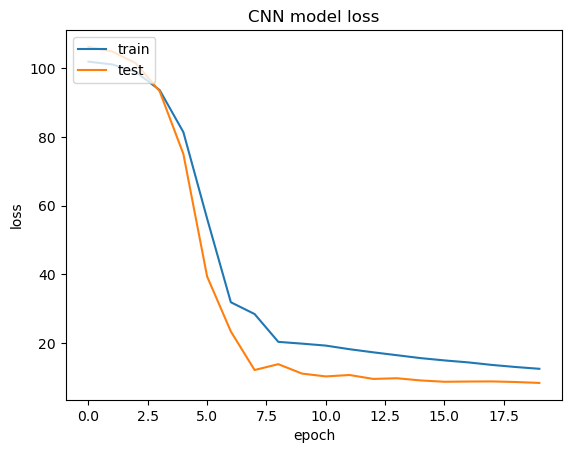

In [76]:
plt.plot(conv_his.history['loss'])
plt.plot(conv_his.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

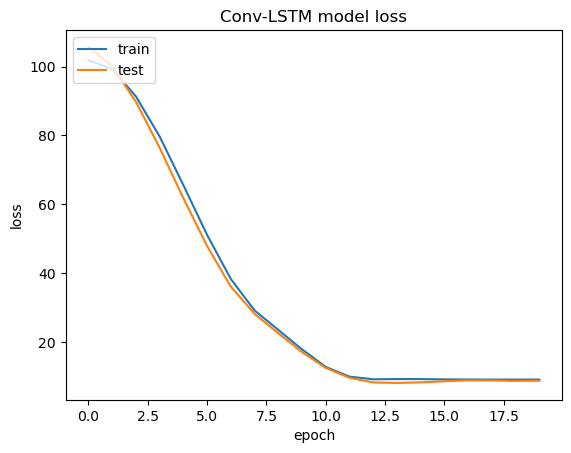

In [77]:
plt.plot(conv_lstm_his.history['loss'])
plt.plot(conv_lstm_his.history['val_loss'])
plt.title('Conv-LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

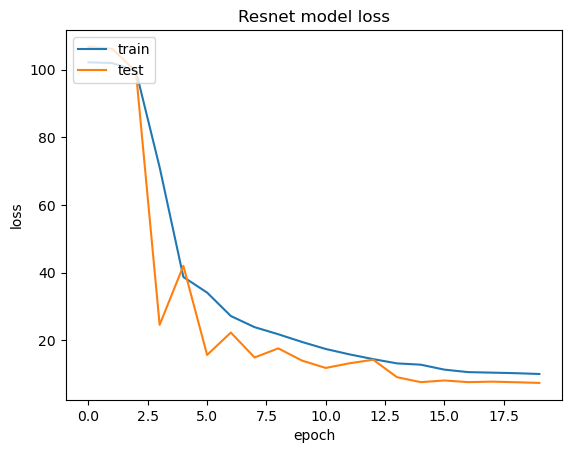

In [80]:
plt.plot(resnet_his.history['loss'])
plt.plot(resnet_his.history['val_loss'])
plt.title('Resnet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
print(f"CNN Model Test Loss:  {conv_his.history['loss'][-1]:.2f}")
print(f"CNN Model Validation Loss:  {conv_his.history['val_loss'][-1]:.2f}")
print()
print(f"Conv-LSTM Model Test Loss:  {conv_lstm_his.history['loss'][-1]:.2f}")
print(f"Conv-LSTM Model Validation Loss:  {conv_lstm_his.history['val_loss'][-1]:.2f}")
print()
print(f"Resnet Model Test Loss:  {resnet_his.history['loss'][-1]:.2f}")
print(f"Resnet Model Validation Loss:  {resnet_his.history['val_loss'][-1]:.2f}")
print()

CNN Model Test Loss:  12.54
CNN Model Validation Loss:  8.43

Conv-LSTM Model Test Loss:  9.15
Conv-LSTM Model Validation Loss:  8.80

Resnet Model Test Loss:  10.05
Resnet Model Validation Loss:  7.41



In [91]:
import joblib
joblib.dump(conv_his, "conv_his.joblib")
joblib.dump(conv_lstm_his, "conv_lstm_his.joblib")
joblib.dump(resnet_his, "resnet_his.joblib")
conv_his = joblib.load("conv_his.joblib")
conv_lstm_his = joblib.load("conv_lstm_his.joblib")
resnet_his = joblib.load("resnet_his.joblib")


In [81]:
conv.save("conv-updated.keras")
conv_lstm.save("conv_lstm-updated.keras")
resnet.save("resnet-updated.keras")

In [83]:
final_inf_data = pd.read_csv("data/preds/14.csv")
pulse_data = np.array(final_inf_data["pulse"])
d = final_inf_data[["sys", "dia"]]

pulse_data, num_samples_inf = sample_data(pulse_data, sample_size)

pulse_data = np.array(pulse_data)
final_inf = model.predict(pulse_data)
for val in final_inf:
    print(val)
d=np.array(d.iloc[0])
print(d)
print(np.mean(final_inf, axis=0))
sysm = 0
diam = 0
print(np.mean(abs(final_inf-d), axis=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
[129.41887  81.31121]
[127.7482   80.35908]
[127.25036  78.60633]
[135.9427   83.57475]
[134.73024  83.23105]
[138.49684  86.37173]
[140.8488   85.89328]
[153 100]
[133.49086   82.763916]
[19.5091411 17.2360818]
